# NoShow Appointment Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **This investigation analysis the data set of "No Show appoitnemnt" and give a conclusions about that analysis**

This dataset collects information from 110k medical appointments in Brazil. The analysis was made to investigate whether or not patients show up for their doctor's appointments and the patterns behind showing to the appointment. The investegation was done on the dependent variable of "no-show" column which indicates whether the patient showed to the appointment or not Vs the independent variables investegated were:

 -  Gender	
 -  ScheduledDay	
 -  AppointmentDay	
 -  Age	
 -  Neighbourhood	
 -  Scholarship	
 -  Hipertension	
 -  Diabetes	
 -  Alcoholism	
 -  Handcap	
 -  SMS_received
This project was done as a part of Udacity Data Analyst Nano degree for analyzing and investigating a data sets.

In [49]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **This section will consider cleaning the data and introduce its general properties**

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
df_noshow = pd.read_csv('noshowappointments.csv')
# Getting the basic info of the data, knowing the types and the shape
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Investegating the general statestics of the data
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Investigating the data leaded to questioning the following questions on the data: 
> ###  1) Does the gender of the patient affect coming to the apointment? Which gender show more? 
> ###  2) Is there a relation between Age of the patient and not showing for the appointment ? 
> ###  3) Is there a relation between type of disease and not showing for the appointment ? 
> ###  4) Does reciving messeages affect coming rate ? 


## Data Cleaning 
> **This section consider only cleaning the data and reidentify columns names and remove any obsticle we can face during the analysis process**

**Show any duplicates in the data**

In [7]:
#See if there is any duplicate data
sum(df_noshow.duplicated())


0

**Set columns names**

In [8]:
#Changing colums name for ease use during the analysis and to be more clearer to users
df_noshow.columns = map(str.lower, df_noshow.columns)
df_noshow.rename(columns={'no-show': 'noshow', 'handcap':'handicap', 'hipertension':'hypertension'}, inplace=True)
df_noshow.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Show is any entity have missing values**

In [9]:
#Checking if there is any missing values in any row so we can get rid of them 
df_noshow.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
noshow            0
dtype: int64

**Removing any ages that are irrelevant like 0,-1, or >100**

In [10]:
df_noshow[df_noshow['age'] < 1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [11]:
df_noshow[(df_noshow['age'] > 100)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [12]:
rej_age= df_noshow[(df_noshow['age'] < 1)].index
reject_age = df_noshow[(df_noshow['age'] > 100)].index
df_noshow.drop(rej_age , inplace=True)
df_noshow.drop(reject_age , inplace=True)

*Used resource* *https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/*

**Dropping the id rows to check any eisting duplicates**

In [13]:
df_noshow.drop(['patientid', 'appointmentid'], axis=1 , inplace=True) 


In [14]:
#Checking if it worked 
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Worked ! 
#Rechecking the duplicates 
sum(df_noshow.duplicated())

625

*There are 625 duplicate that we shall remove*

In [16]:
df_noshow.drop_duplicates(inplace = True)
sum(df_noshow.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Now the data are trimmed and cleaned. We will begin the exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.**

### 1) Is there a relation between gender of the patient and not showing for the appointment ? 

In [17]:
#Getting the mean of the data and groub them by the gender into female or male 
df_noshow.groupby('gender').mean()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
gender,,,,,,,
F,39.846972,0.125967,0.218917,0.080022,0.017462,0.019887,0.340866
M,35.407834,0.053734,0.175059,0.063172,0.058016,0.028422,0.295347


 **Convert the noshow data into zero and ones so we can use it in charts**

In [18]:
#Convert the "no show data" into binary for easier use
df_noshow['noshow'] = df_noshow['noshow'].apply(lambda x: 0 if x.strip()=='No' else 1)

In [19]:
#Show the first 5 rows of the data to check the changes 
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [20]:
#Counting which gender showed to the appointment and which didn't show 
gender = df_noshow.groupby(["noshow","gender"])["gender"].count()
gender

noshow  gender
0       F         55558
        M         29337
1       F         14135
        M          7325
Name: gender, dtype: int64

**Plotting a pie to visualize the findings**

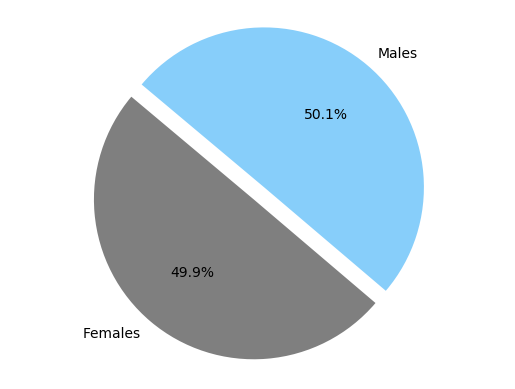

In [102]:
#Plotting a pie chart to represent the "on show" data depending on the gender
Females = 57246/(57246+14594)
Males = 30962/(30962+7725)

labels = 'Females', 'Males'
sizes = [Females, Males]
colors = ['C7', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

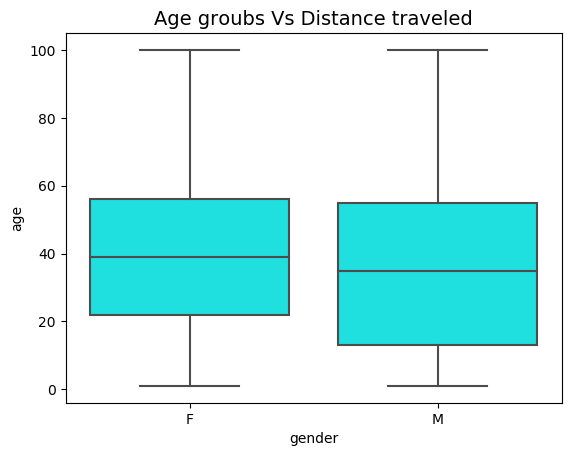

In [71]:
size = (15, 10)
ax = sb.boxplot(data = df_noshow, x = 'gender', y = 'age', color = 'aqua')
ax.set_title('Age groubs Vs Distance traveled', fontsize=14);

The charts shows no relationship between the gender of the patients and thier comittment to the appointment 

### 2) What ages are most ubsent?

In [22]:
#We will divide the patients into 4 groups by age into ('Babies', 'Young', 'Middle', 'Old') 
#test if there is a specific age are more likely to no show to the appointment 
df_noshow0 = df_noshow[df_noshow.noshow != 1]
babies = df_noshow0[(df_noshow0['age'] <= 5) & (df_noshow0['age'] >= 1)]
young = df_noshow0[(df_noshow0['age'] >= 6) & (df_noshow0['age'] <= 29)]
middle = df_noshow0[(df_noshow0['age'] >= 30) & (df_noshow0['age'] <= 49)]
old = df_noshow0[(df_noshow0['age'] > 50)]
babies = babies.age.count()
young = young.age.count()
middle = middle.age.count()
old = old.age.count()
old


29572

**Plotting a bar to visualize the findings**

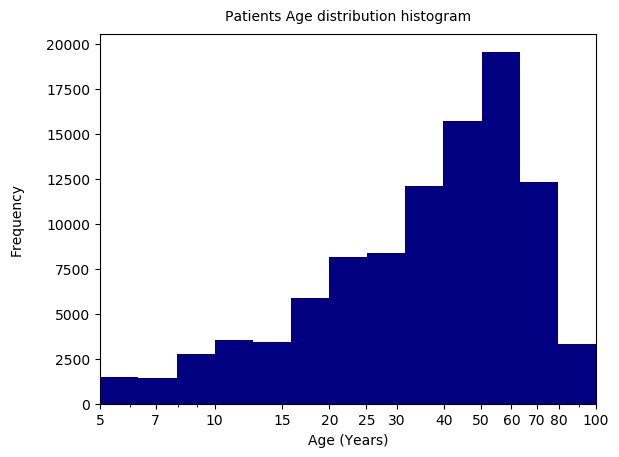

In [76]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_noshow['age'].max())+log_binsize, log_binsize)
plt.hist(data = df_noshow, x = 'age', bins = bins,color='navy');
plt.xscale('log');
plt.xlim(5,100);
plt.xticks([5,7,10,15 ,20,25,30, 40, 50,60,70,80, 100], [5, 7,10,15 ,20,25,30, 40, 50,60,70,80 , 100]);
plt.title('Patients Age distribution histogram', fontsize=10, y=1.015)
plt.ylabel('Frequency', labelpad=16)
plt.xlabel('Age (Years)');

The histogram shows that most of the patients studied are between the age of 50 and 65 years old

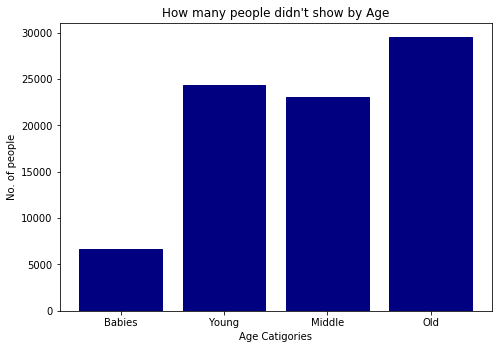

In [61]:
#plot the bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = ['Babies', 'Young', 'Middle', 'Old']
yaxis = [babies,young,middle,old]
ax.bar(xaxis,yaxis,color='navy', edgecolor='navy')
ax.set_xlabel('Age Catigories')
ax.set_ylabel('No. of people')
ax.set_title("How many people didn't show by Age")
plt.show()

The old and young categories of people was the most of all pateints who didn't show for the appointment.

### 3) Is there a relation between type of disease and not showing for the appointment ? 

In [24]:
#We will divide the patients into 4 groups by thier disease into ('hypertension', 'diabetes', 'alcoholism', 'handicap')
#test if there is a specific patients are more likely to no show to the appointment 
hypertension = df_noshow0.query('hypertension == 1')
diabetes= df_noshow0.query('diabetes == 1')
alcoholism= df_noshow0.query('alcoholism == 1')
handicap= df_noshow0.query('handicap == 1')

hypertension = hypertension.hypertension.count()
diabetes = diabetes.diabetes.count()
alcoholism = alcoholism.alcoholism.count()
handicap = handicap.handicap.count()

**Plotting a bar to visualize the findings**

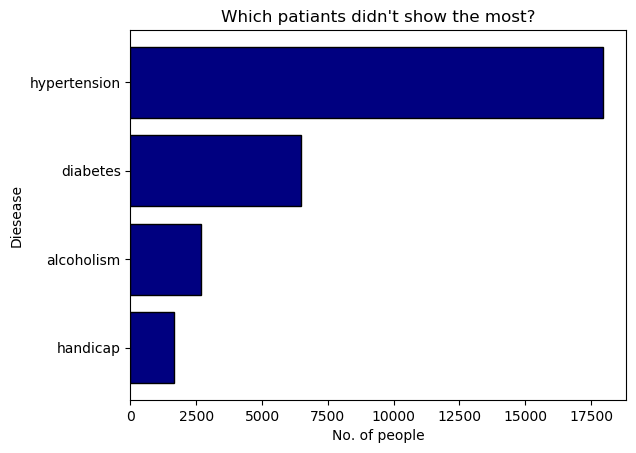

In [62]:
plt.rcdefaults()
fig, ax = plt.subplots()
Disease = ('hypertension', 'diabetes', 'alcoholism', 'handicap')
y_pos = np.arange(len(Disease))
counter = [hypertension, diabetes, alcoholism, handicap]

ax.barh(y_pos, counter, color='navy', edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(Disease)
ax.invert_yaxis()  
ax.set_xlabel("No. of people")
ax.set_ylabel("Diesease")
ax.set_title("Which patiants didn't show the most?")

plt.show()

we can notice that patients with Hypertension are the most category of patients don't show for thier appointment

### 4) Does resciving messeges affect coming rate? 

In [26]:
#We will taste if the patients who recived messeages was more likely to show to the appointment
#Group the patients by who recived a messeages and who didn't and which of those shoed to the appointment 
recived = df_noshow.groupby(["sms_received","noshow"])["noshow"].count()
recived

sms_received  noshow
0             0         59879
              1         11892
1             0         25016
              1          9568
Name: noshow, dtype: int64

**Plotting a Pie to visualize the findings**

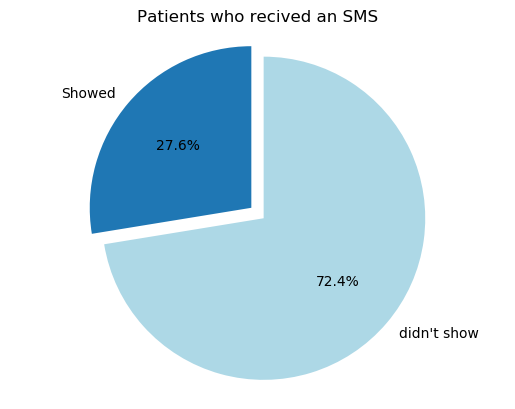

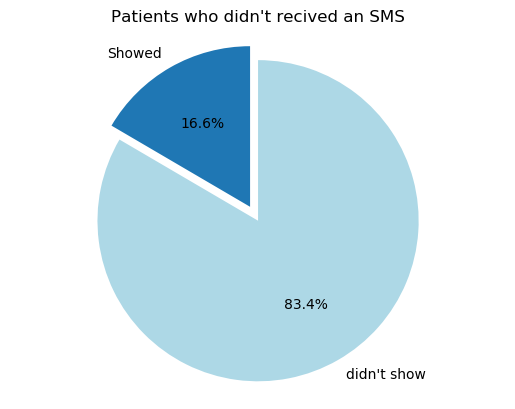

In [101]:
#The data from the findings
Show_re =  9784
noshow_re = 25698
show = 11892
noshow = 59879

#Plotting the pie chart 
labels = 'Showed', "didn't show"
sizes = [Show_re, noshow_re]
colors = ['C0', 'lightblue']
explode = (0.1, 0)  # explode 1st slice

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Patients who recived an SMS')
plt.show()
#Second pie chart 

labels = 'Showed', "didn't show"
sizes = [show, noshow]
colors = ['C0', 'lightblue']
explode = (0.1, 0)  # explode 1st slice

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90)
plt.title("Patients who didn't recived an SMS")
plt.axis('equal')
plt.show()

Pie charts indicates that patients who recived an SMS showed more than who didn't 

<a id='conclusions'></a>
## Conclusions


> From the first question which assumed that a certain gender didn't show in the appointment, but it appeared that the gender don't affect the rate of showing to the appointment.

> Noticing from the second question that the most ubsent people are elder people (>50 years), afterwards came the young pepole (6-29 years). However the results imply no big diffrence in people showed based on age. 

> From third hypothesis we can notice that patients with hypertension are more likely to miss the appointment 


> Finally, it's very obvious that reciving an SMS affects patients behaviour making them are more likely to show to the appointment than patients who didn't recive any SMS 

## Limitations 


The analysis has some limitations regarding the data itself such as:
        
<li> The column of the date schuduled could benfit the analysis more if the week day exists, so that it would give the chance     to explore if there is a specific day that people hate to come in like holiday or something </li>